# 3 MNIST手写体识别
> 在运行本教程中代码前请先安装好`numpy`、`tensorflow`和`matplotlib`。安装方式：在`命令提示符`或`Powershell`下运行以下命令：
> > `pip install --user --default-timeout=0 numpy tensorflow matplotlib`

In [1]:
# 导入库
import numpy as np
import tensorflow as tf

In [2]:
# 加载数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 初始化输入数据
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# 查看数据集的大小和形状
print(np.shape(x_train))
print(np.shape(y_train))

(60000, 28, 28)
(60000,)


In [4]:
# 构建神经网络模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# 查看模型结构
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 训练模型
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2954 - accuracy: 0.9147
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1432 - accuracy: 0.9571
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1078 - accuracy: 0.9674
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0863 - accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0751 - accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671 - accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0582 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0517 - accuracy: 0.9827
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0474 - accuracy: 0.9840
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.043

In [8]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0656 - accuracy: 0.9805


[0.0655524879693985, 0.9804999828338623]

In [9]:
# 导入库
from matplotlib import pyplot as plt

In [10]:
# 利用模型进行预测
res=model.predict(x_test)
res=np.argmax(res,axis=1)

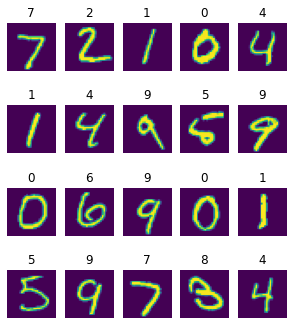

In [11]:
# 输出预测结果
plt.figure(figsize=(5,5))
for img,i in zip(x_test,range(20)):
    plt.subplot(4,5,i+1)
    plt.subplots_adjust(top=1)
    plt.axis('off')
    plt.imshow(img)
    plt.title(res[i])